In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
%matplotlib inline

import warnings                    
warnings.filterwarnings('ignore')

import math

rc = {
    "axes.facecolor": "#E6FFE6",
    "figure.facecolor": "#E6FFE6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

In [13]:
df = pd.read_csv('PRDECT-ID Dataset.csv')

df.head()


,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [15]:
# Checking the shape of the dataset, rows, columns, duplicate entries & missing values

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 5400
Number of features (columns) in the dataset are: 11
Number of duplicate entries in the dataset are: 7
Number missing values in the dataset are: 0


In [17]:
df.dropna(subset=['Customer Review'], inplace=True)


In [19]:
# Removing duplicates
df.drop_duplicates(subset=['Customer Review'], keep='first', inplace=True)


In [21]:
# Removing irrelevant columns
df.drop(['Location', 'Price', 'Number Sold'], axis=1, inplace=True)


In [23]:
df.describe().style.background_gradient(cmap='tab20c')


,Overall Rating,Total Review,Customer Rating
count,5305.000000,5305.000000,5305.000000
mean,4.854288,2158.940245,3.101791
std,0.108556,2912.542848,1.762642
min,4.100000,4.000000,1.000000
25%,4.800000,574.000000,1.000000
50%,4.900000,1188.000000,3.000000
75%,4.900000,2561.000000,5.000000
max,5.000000,24500.000000,5.000000


In [27]:
# 1. Lowercasing
df['Customer Review'] = df['Customer Review'].str.lower()


In [29]:
# 2. Removing special characters
df['Customer Review'] = df['Customer Review'].str.replace('[^\w\s]', '')


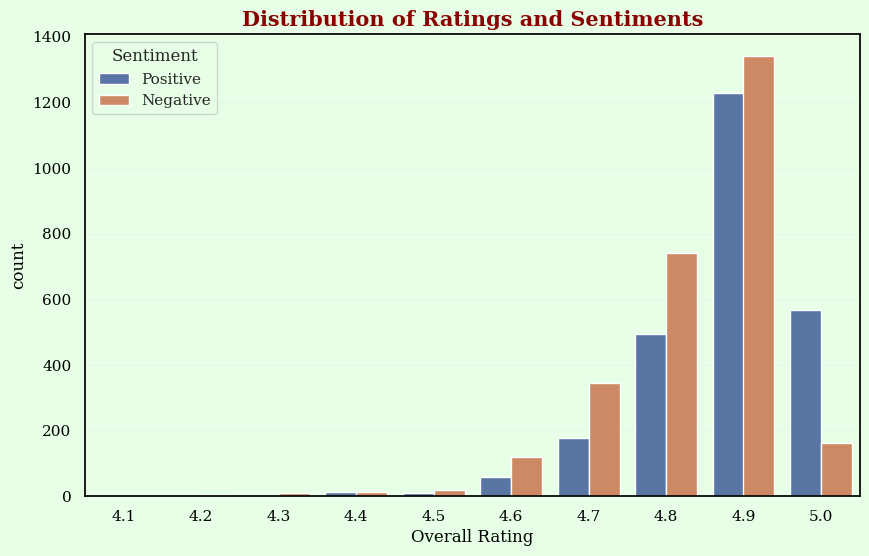

In [33]:
# A. Distribution of Ratings and Sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='Overall Rating', hue='Sentiment', data=df)
plt.title('Distribution of Ratings and Sentiments', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Distribution of Ratings and Sentiments.png')
plt.show()

In [42]:
# 1. Using Customer Rating
df['Sentiment (Using Rating)'] = df['Overall Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')


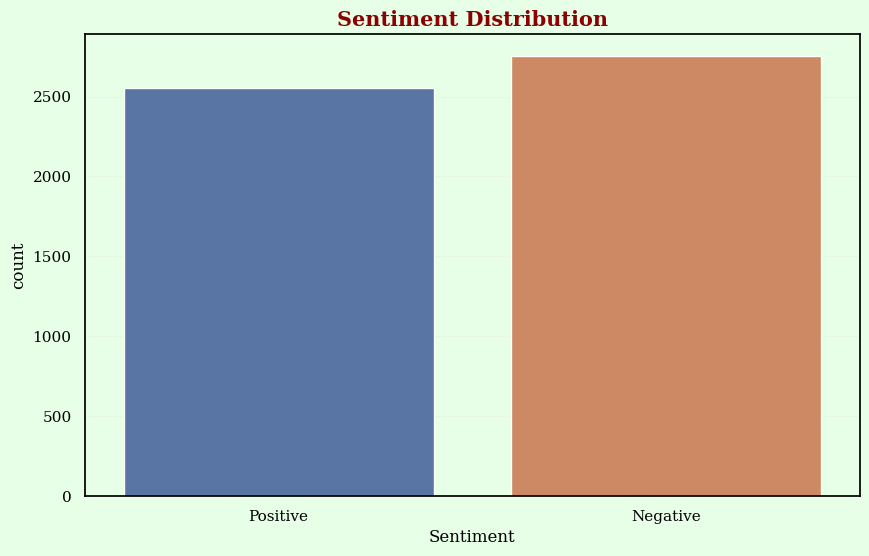

In [46]:
# B. Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Sentiment Distribution.png')
plt.show()


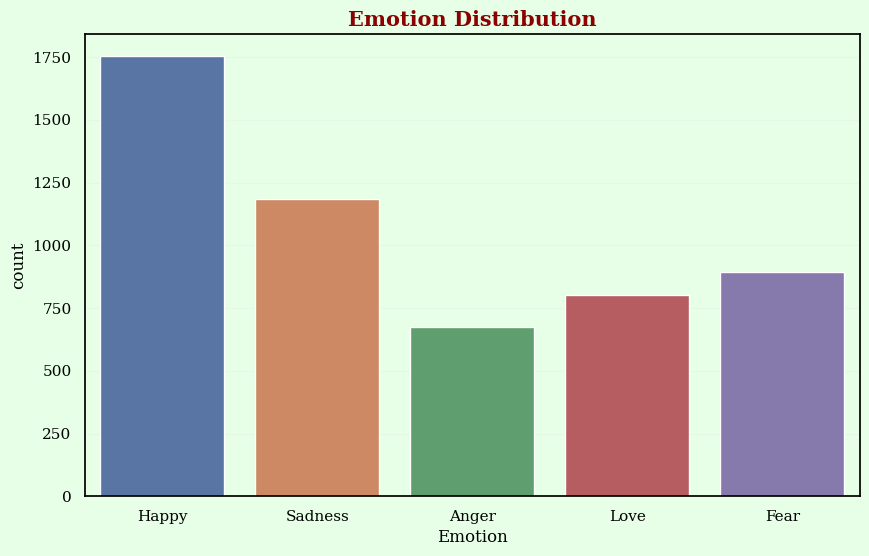

In [48]:
# B. Emotion Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=df)
plt.title('Emotion Distribution', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Emotion Distribution.png')
plt.show()


In [50]:
# C. Emotion Analysis Techniques (Rule-based approach using predefined emotion keywords)
happy_keywords = ['love', 'happy', 'joy', 'excited']
sad_keywords = ['sad', 'disappointed', 'unhappy', 'regret']
neutral_keywords = ['neutral', 'okay', 'fine']

def classify_emotion(text):
    if any(word in text for word in happy_keywords):
        return 'Happy'
    elif any(word in text for word in sad_keywords):
        return 'Sad'
    elif any(word in text for word in neutral_keywords):
        return 'Neutral'
    else:
        return 'Other'

df['Emotion (Rule-based)'] = df['Customer Review'].apply(classify_emotion)


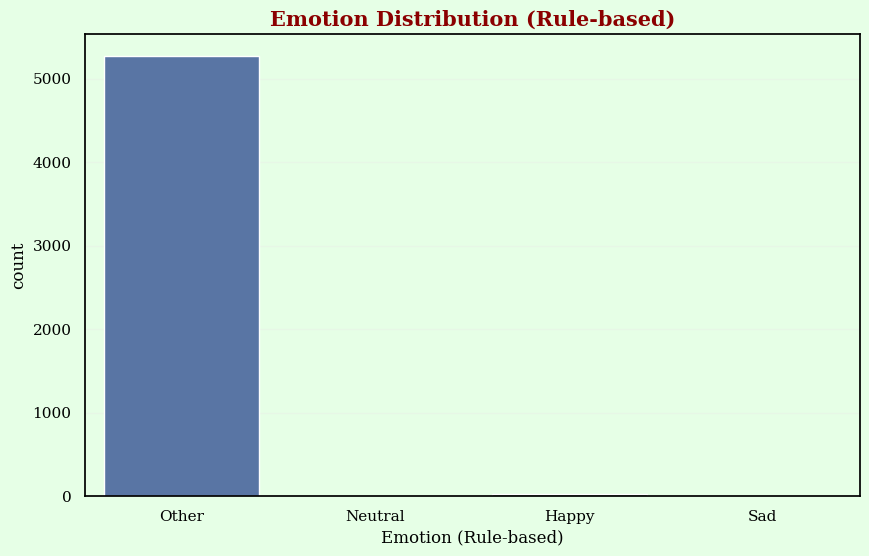

In [52]:
# D. Evaluation Metrics 

# Additional visualization for Emotion Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion (Rule-based)', data=df)
plt.title('Emotion Distribution (Rule-based)', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Emotion Distribution (Rule-based).png')
plt.show()

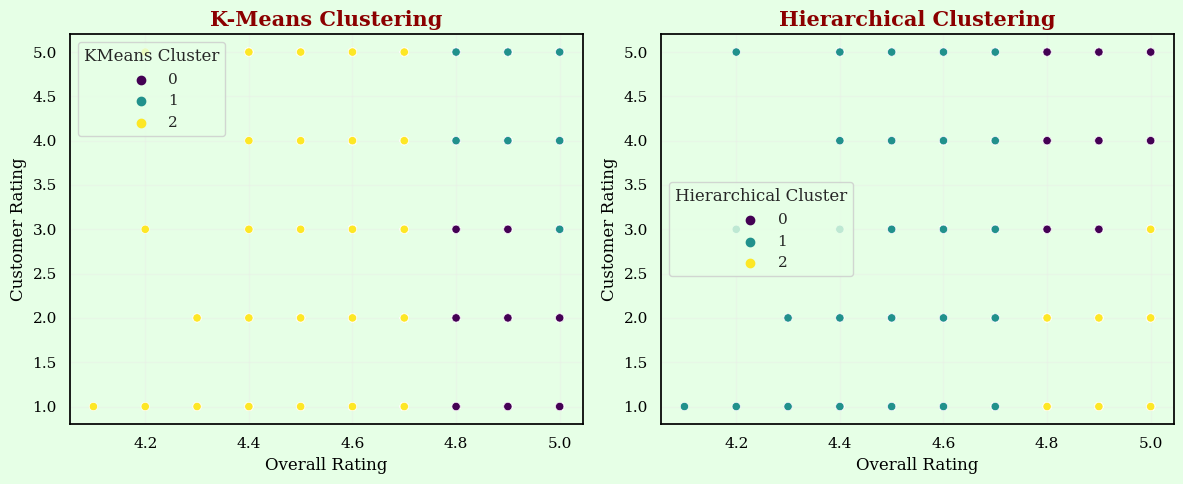

K-Means Cluster Counts:
KMeans Cluster
1    2286
0    2248
2     771
Name: count, dtype: int64

Hierarchical Cluster Counts:
Hierarchical Cluster
0    2617
2    1917
1     771
Name: count, dtype: int64


In [54]:
# Feature Selection for Clustering
X = df[['Overall Rating', 'Customer Rating']]  # Select relevant features for clustering

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Customer Segmentation using K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
df['KMeans Cluster'] = kmeans.fit_predict(X_scaled)

# Customer Segmentation using Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical Cluster'] = hierarchical.fit_predict(X_scaled)

# Visualize the Clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Overall Rating', y='Customer Rating', hue='KMeans Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering', fontsize = 15, fontweight = 'bold', color = 'darkred')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Overall Rating', y='Customer Rating', hue='Hierarchical Cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering', fontsize = 15, fontweight = 'bold', color = 'darkred')

plt.tight_layout()
plt.savefig('K-Means Clustering & Hierarchical Clustering.png')
plt.show()

# Print Results 
kmeans_counts = df['KMeans Cluster'].value_counts()
hierarchical_counts = df['Hierarchical Cluster'].value_counts()

print("K-Means Cluster Counts:")
print(kmeans_counts)
print("\nHierarchical Cluster Counts:")
print(hierarchical_counts)


In [56]:
# Scale the features

scaler = StandardScaler()
X_kmeans =  scaler.fit_transform(X)
print(X_kmeans)


[[0.42112583 1.07701292]
 [0.42112583 1.07701292]
 [1.34239286 1.07701292]
 ...
 [0.42112583 1.07701292]
 [0.42112583 1.07701292]
 [0.42112583 1.07701292]]


In [58]:
# Model fitting with 5 clusters

clusters = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = clusters.fit_predict(X_kmeans)
y_kmeans


array([1, 1, 1, ..., 1, 1, 1])

In [60]:
## Creating a New Dataframe with an appended cluster column

df_Kmeans = df.copy()            
df_Kmeans['Cluster'] = y_kmeans  
print(df_Kmeans.head(5))


                Category                                       Product Name  \
0  Computers and Laptops  Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...   
1  Computers and Laptops  PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...   
2  Computers and Laptops                SSD Midasforce 128 Gb - Tanpa Caddy   
3  Computers and Laptops  ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
4  Computers and Laptops  ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   

   Overall Rating  Total Review  Customer Rating  \
0             4.9          2369                5   
1             4.9          1044                5   
2             5.0          3573                5   
3             4.7           672                5   
4             4.7           672                5   

                                     Customer Review Sentiment Emotion  \
0  alhamdulillah berfungsi dengan baik. packaging...  Positive   Happy   
1  barang bagus dan respon cepat, harga bersaing ...  Positive  

In [62]:
# Let's start the Hierarchial analysis by normalizing the data and
# building a dataframe for analysis
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()

X_Hierar = norm.fit_transform(X)
X_Hierar = pd.DataFrame(X_Hierar, columns=X.columns)
print(X_Hierar.head(5))


   Overall Rating  Customer Rating
0        0.888889              1.0
1        0.888889              1.0
2        1.000000              1.0
3        0.666667              1.0
4        0.666667              1.0


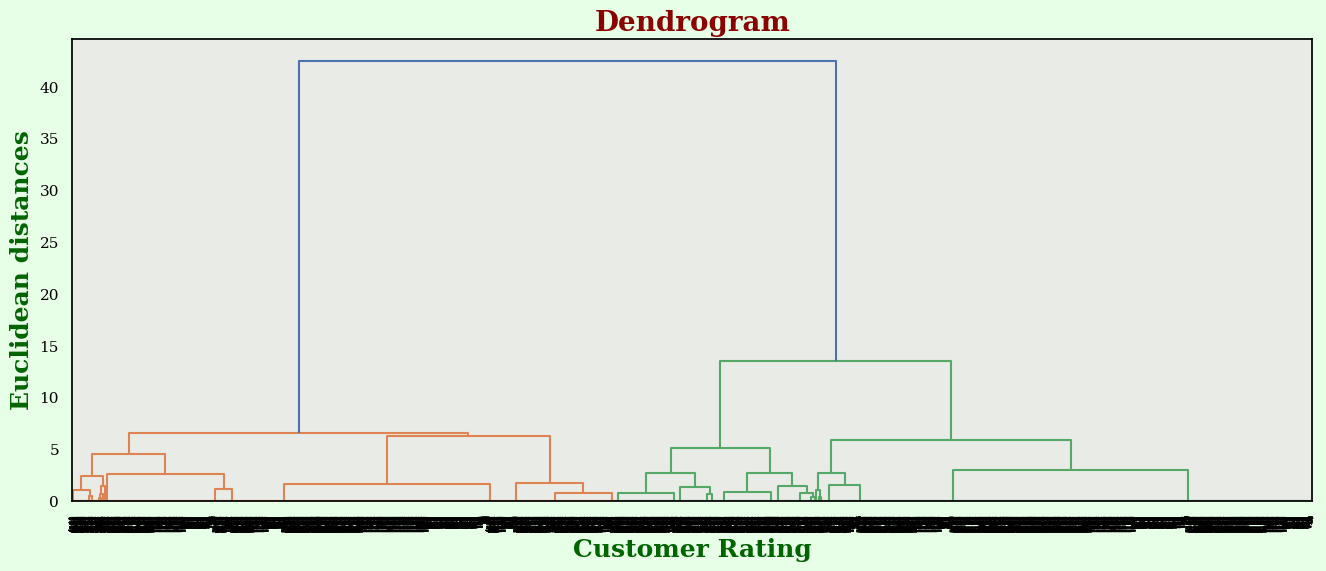

In [65]:
# Build dendrogram to find out the optimal number of clusters
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.title('Dendrogram', fontsize=20, fontweight = 'bold', color = 'darkred')
plt.xlabel('Customer Rating', fontsize=18, fontweight = 'bold', color = 'darkgreen')
plt.ylabel('Euclidean distances', fontsize=18,fontweight = 'bold', color = 'darkgreen')
plt.savefig('Dendrogram.png')
plt.show()


In [ ]:
## 🧾 Conclusion

In this text mining analysis project, we explored customer reviews from the PRDECT-ID dataset. The main steps followed included:

- **Data Cleaning**: Removed null values, duplicate entries, irrelevant columns, and cleaned the text by converting to lowercase and removing special characters.
- **Data Organization**: Structured the dataset to include only relevant columns like review, rating, sentiment, and emotion.
- **Visualization**: Plotted graphs to analyze the distribution of overall ratings, sentiment, and emotions.
- **Sentiment & Emotion Analysis**: Used both provided labels and rule-based keyword detection to categorize the emotional tone and sentiment of reviews.

Overall, this analysis helped us understand the mood and satisfaction level of customers based on their textual feedback, which is a vital part of product evaluation and customer experience improvement.

